In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

DF = pd.read_csv('Dataset_.csv')
DF = DF.drop(columns=['Day','Type'])
x = StandardScaler().fit_transform(DF)
i=0
df = pd.DataFrame()
for column in DF.columns:
    series = pd.Series(x[:,i])
    df.insert(i,column,series)
    i+=1
series = pd.Series(np.ones(61))
series[4:8] = 0
df.insert(len(df.columns),'class',series)
df

,F0,Fj,Fm,FI,F300mks,F50mks,t(Fm),Vj,VI,phi P0 (Fv/Fm),...,DI0/RC,ET0/RC,RE0/RC,RC/CS0,Am,SM,SS,N,Vav,class
0,0.262939,0.104620,1.678068,1.300215,0.261811,0.382466,0.411486,-1.137770,-1.438963,0.839119,...,-0.548089,1.547979,1.880735,0.540333,1.588447,0.931282,-0.699535,1.253788,-0.804283,1.0
1,-0.098103,0.326437,1.268537,0.856298,0.083020,0.045723,-0.027775,-0.627380,-1.514554,0.868221,...,-0.768532,0.395252,1.416806,1.050125,1.101075,0.620354,0.593024,0.559188,-0.773746,1.0
2,0.172679,0.331058,1.019256,1.057118,0.109839,0.031082,1.321383,-0.551977,-0.078221,0.568487,...,-0.590259,0.315984,-0.079498,1.213624,1.027696,0.708499,0.603354,0.648923,-0.064301,1.0
3,0.019236,0.391133,1.105317,1.064164,0.570225,0.309261,0.474237,-0.504754,-0.322246,0.712444,...,-0.420548,0.973613,0.686654,-0.057566,1.030657,0.646201,-0.940366,0.995282,-0.459995,1.0
4,0.885736,0.811659,-1.844498,-1.641614,0.780305,1.253606,-1.157303,3.285916,1.192798,-2.362714,...,2.044752,-3.381029,-1.233530,-0.941765,-1.895149,-1.904775,-0.265802,-2.044984,1.979871,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.332780,-0.052500,0.844167,0.722419,-0.203045,-0.312981,0.317358,-0.665090,-0.518180,0.808832,...,-0.713320,0.491500,0.424431,0.558275,0.615091,0.306844,0.453713,0.260825,-0.190569,1.0
57,0.416382,1.440139,0.482117,0.831636,0.972505,0.419069,-0.718042,0.896965,1.099400,0.096566,...,-0.305877,-1.153086,-1.320309,1.238729,-0.504653,-0.623480,0.696663,-0.756633,0.319019,1.0
58,-0.224467,0.589843,0.241740,0.426474,1.106598,-0.210494,-0.247406,0.373956,0.631113,0.399288,...,0.024213,0.468179,-0.117467,-1.307864,-0.336983,-0.431143,-1.954865,-0.057767,0.340927,1.0
59,-0.639665,-0.801129,0.535534,0.260886,-0.891389,-0.730250,0.317358,-1.118353,-0.990438,0.855488,...,-0.790641,0.789933,0.799655,0.388379,0.792477,0.578581,0.804989,0.467131,-0.486567,1.0


In [38]:
x = df.drop('class', axis=1)
y = df['class']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [40]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_pred)

[[ 1  0]
 [ 0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'PCA 2')

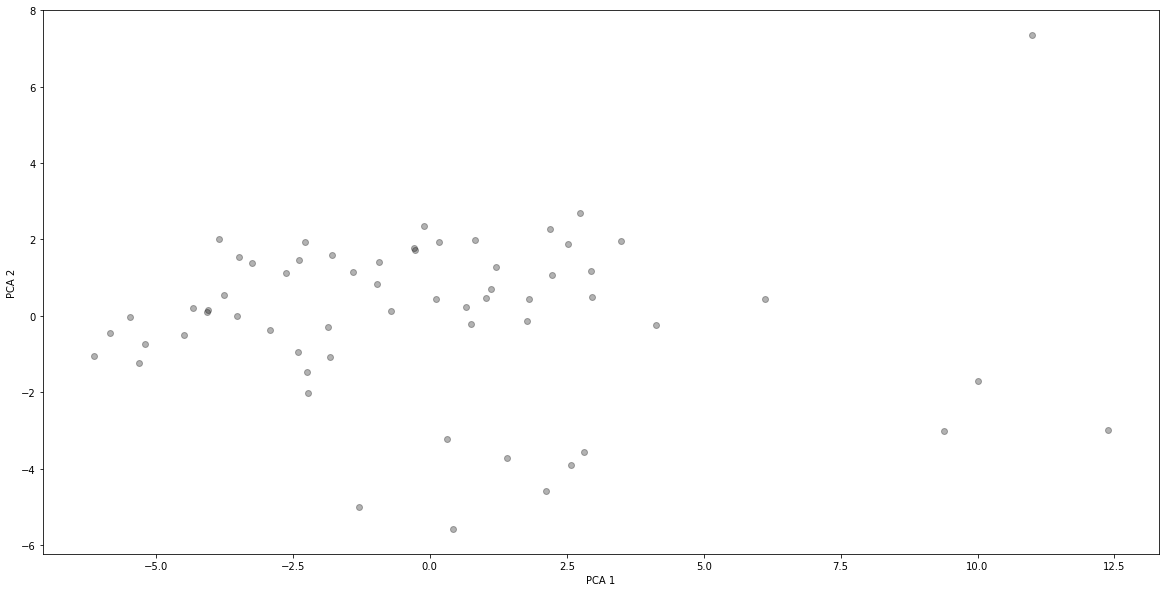

In [41]:
x_pca = np.concatenate((x_test, x_train), axis=0)
y_pca = np.concatenate((y_pred, y_train), axis=0)
i=0
df_pca = pd.DataFrame()
for column in df.drop(columns='class').columns:
    series = pd.Series(x_pca[:,i])
    df_pca.insert(i,column,series)
    i+=1
series_y_pca = pd.Series(y_pca)
df_pca.insert(len(df_pca.columns),'class',series)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_pca)
PCA_components = pd.DataFrame(principalComponents)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

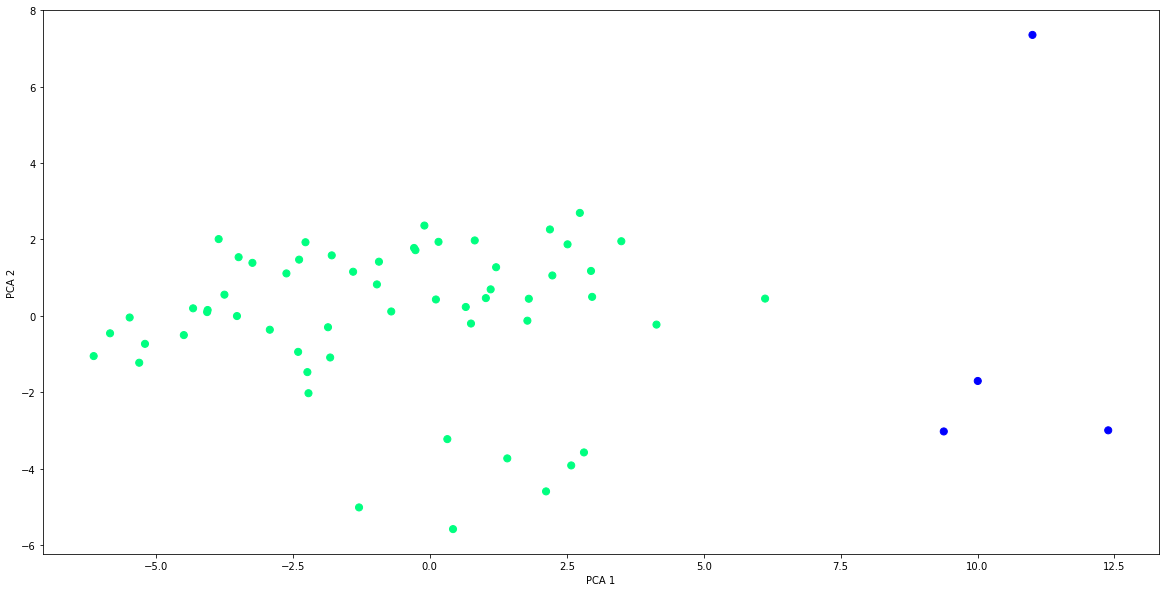

In [49]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(PCA_components[0], PCA_components[1], c=y_pca, cmap='winter',s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')